# Sorting Algorithms
***
Sorting Algorithms solve the so-called "sorting problem":
 - **Input**: A sequence of n numbers ($a_1,a_2,...,a_n$)
 - **Output**: A permutation (reordering) ($a_1',a_2',...,a_n'$) such that $a_1'≤a_2'≤,...,a_n'$.


In the following notebook, I will try to code and analyze the most common sorting agorithms:
 - **Insertion Sort**
 - **Merge Sort**
 - **Quick Sort**

## Insertion Sort

**The idea**:

Imaging havening a deck of cards.
***
<div>
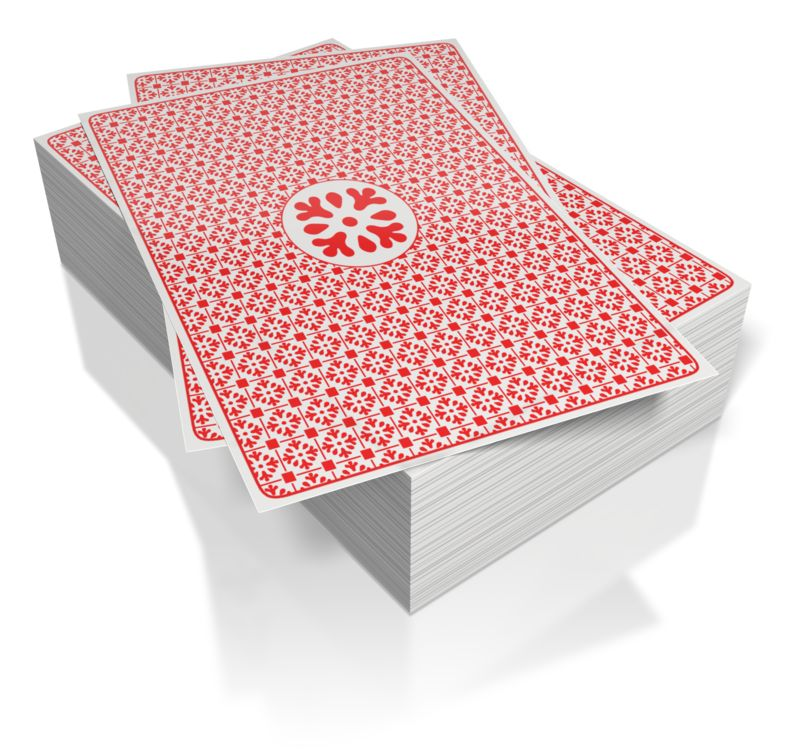
</div>

***
A natural way to do sort the deck in order is the following:
 - Pick the first card from the deck and place place it in yout hand.
 - Pick the second card, compare it with the card in your hand and place it in the right order.
 - Pick another card at compare it with the cards in your hand from left to right and place it in the right order.
 - Continue until the deck is empty.
 
Voilà, all the cards in your hand are sorted. 

Note: at each point in time, the cards in your hand are sorted.

**The Algorithm**:

Now, insted of having a deck of cards we have a list of numbers. The procedure is still the same:
 - Pick the first number in the list
 - Pick the second number, compare it to the first and place it in order. 
 - Pick the third number, compare it to the first two from left to right and place it in order.
 - Continue until all the numbers in the list have been picked
***
<div>
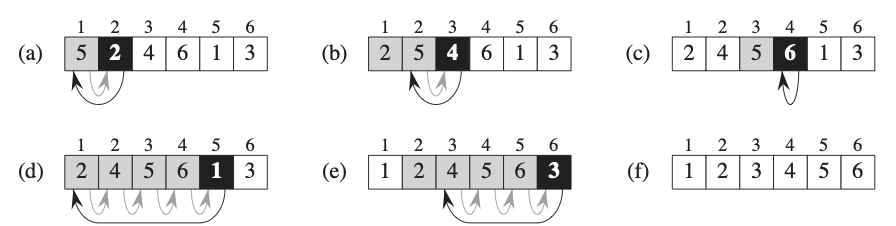
</div>

***

**The Performance**:


The worst case running time of Insertion Sort is $\Theta(n^2)$.

Thus, Insertion Sort is actually a good algorithm for sorting a small array on numbers but it is quite inefficent for larger arrays. 

**Implementation In Julia**:

In [68]:
function Insertion_Sort(array)
    for i in 1:size(array)[1] #we loop over the entire array
        j = i  #element i represents the card(s) in our hand, element j is the card from the deck
        while j>1 && (array[j-1] > array[j]) #if element j-1 is larger than element j...
            array[j-1],array[j] = array[j],array[j-1] #we swap them
            j = j-1
        end
    end
    return array
end

Insertion_Sort (generic function with 1 method)

## Merge Sort

**The Idea**:

Merge Sort is a sorting algorithm that was invented by John von Neumann in 1945. As the  algorithms follows a divide and conquer paradigm, the problem is divided into subproblems, the subproblems are solved and the solutions are merged together.

Let's start again with our deck of cards. This time, we proceed as follows:

**Divide**

 - We take our deck and split it in two
 - We take the two smaller decks and split them in two
 - We continue until each subdeck is made of one card.

<div>
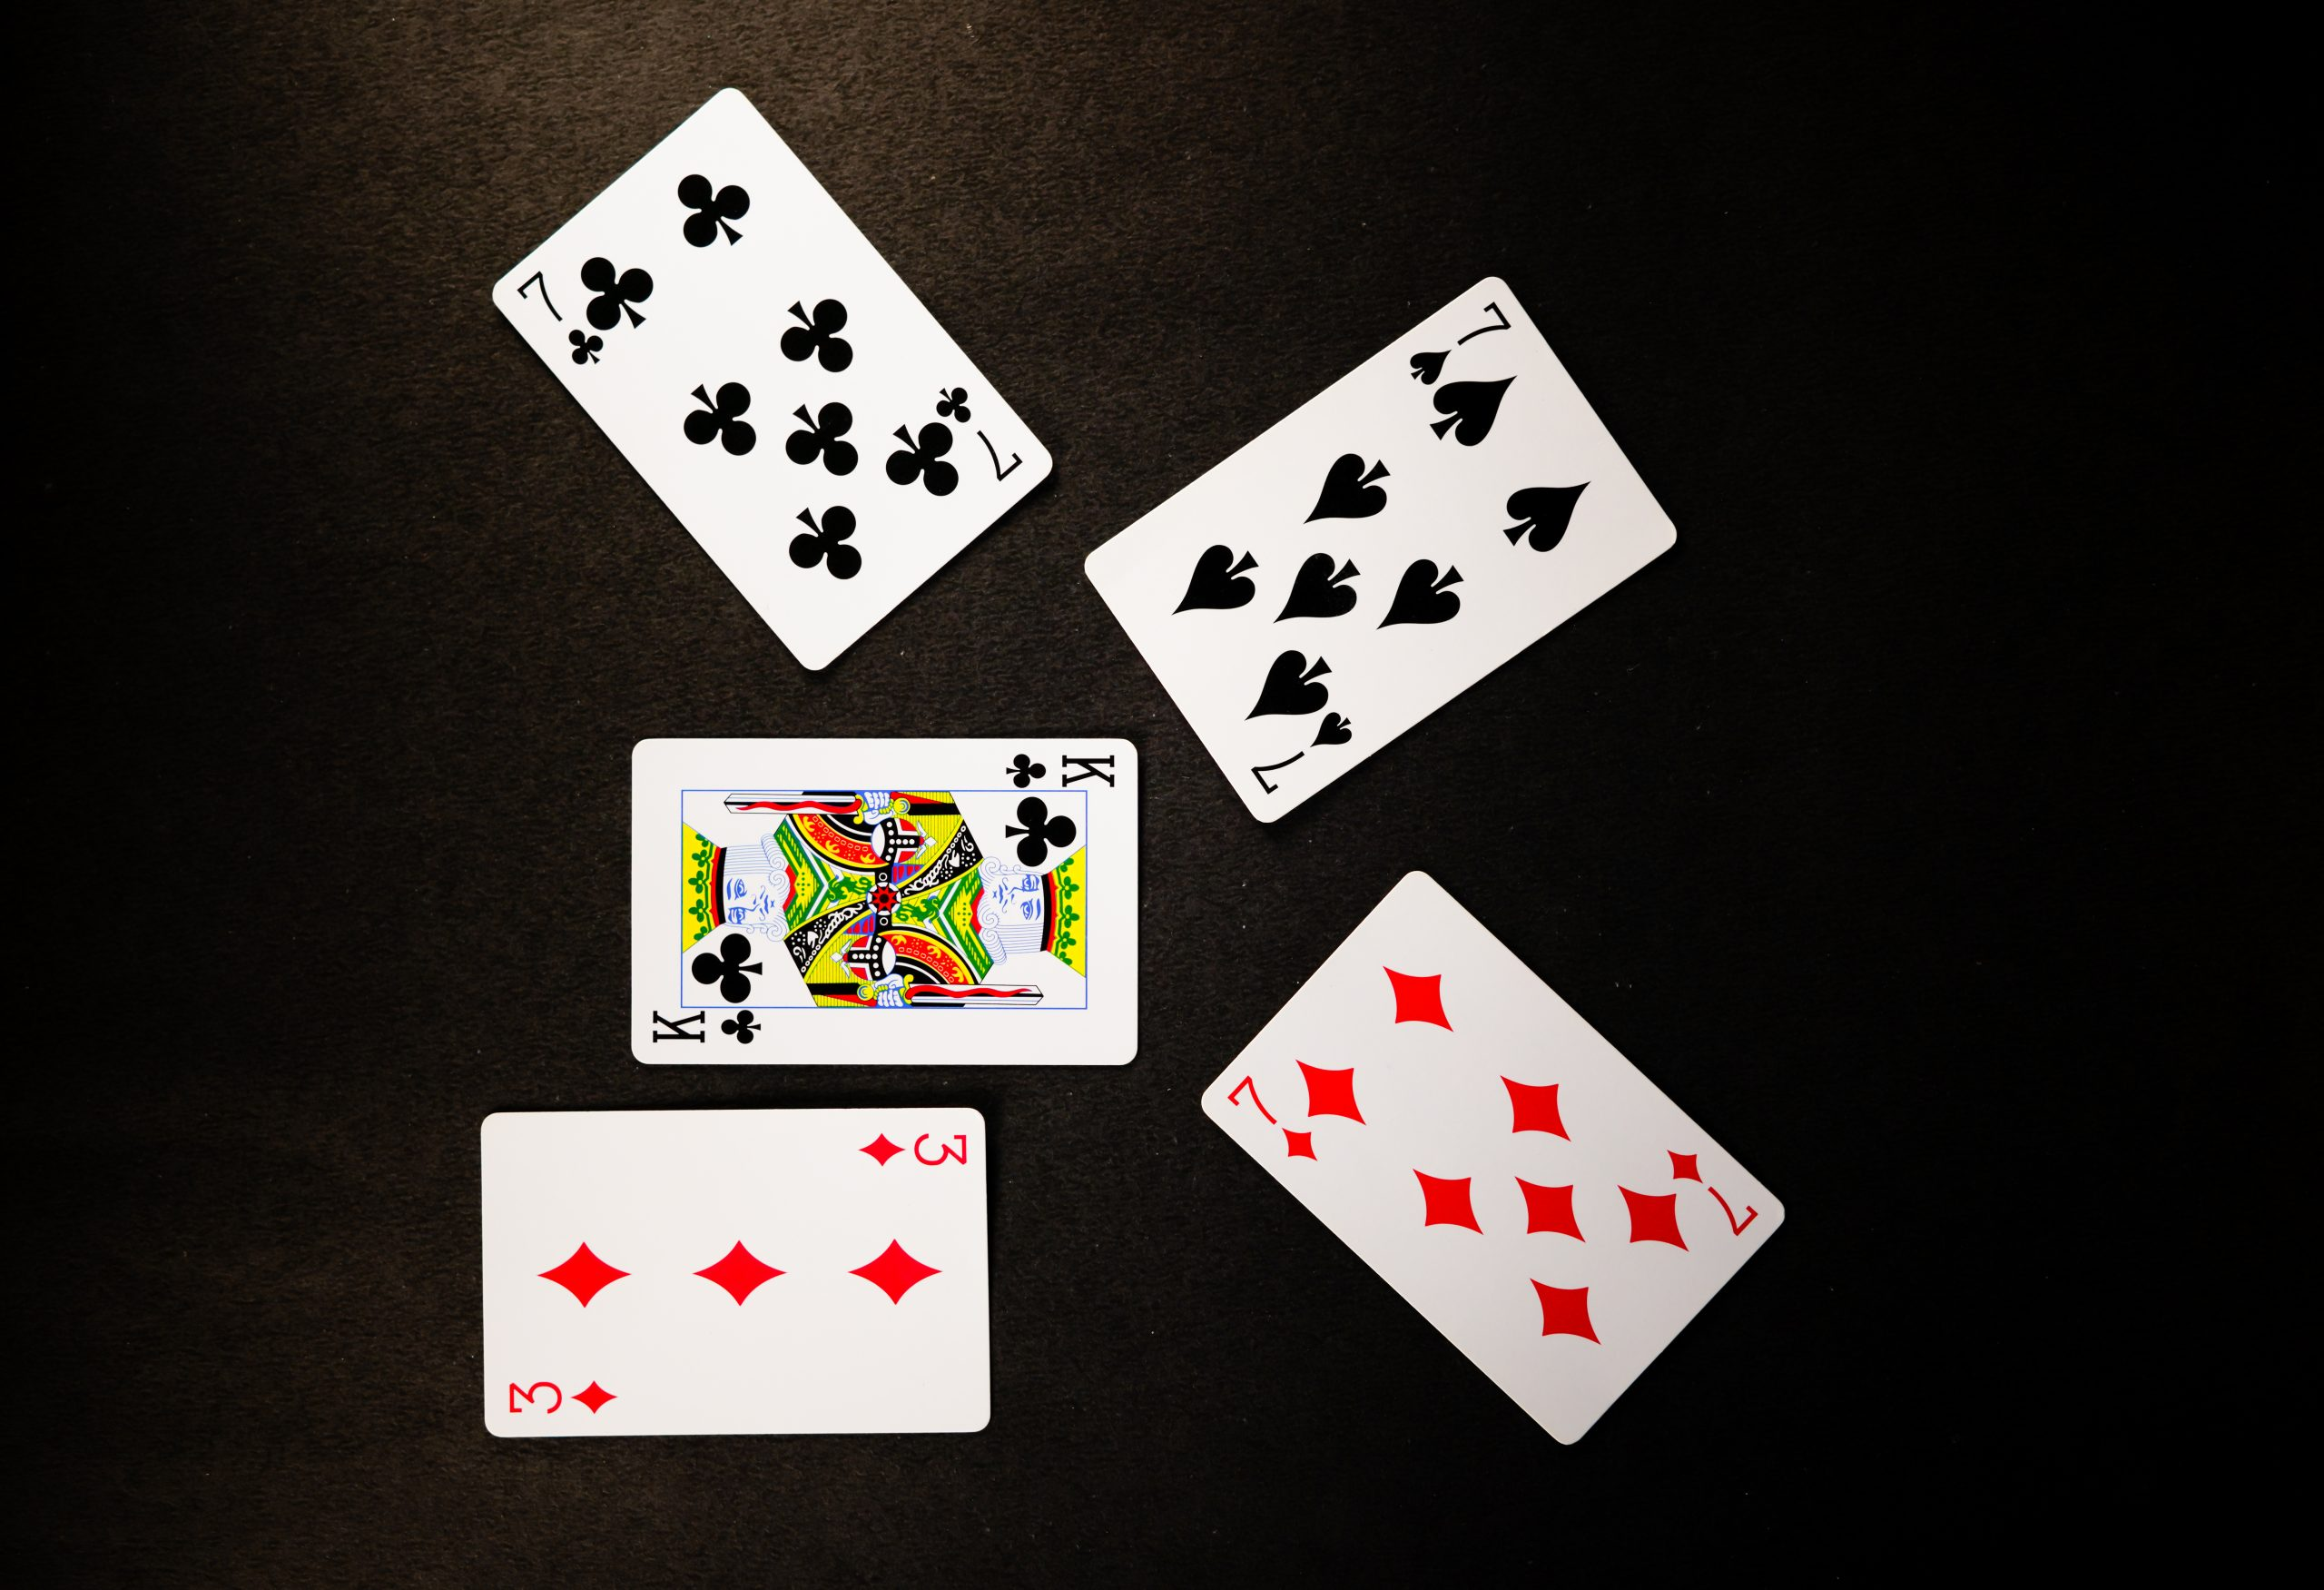
</div>
 
**Conquer**
 - Now, we begin the **Merging** Procedure. We pick pairs of cards and merge them in order. We have n/2 ordered pairs of cards.
 - We pick 2 pairs and merge them in order. Now we have n/4 ordered subdecks of size 4.
 - We continue this procedure until we have merged all the subdecks.
 
Voilà, we have a deck of ordered cards.


**The Algorithm**:

Conceptually, the merge sort algorithm works as follows:

 - Divide the unsorted list into n sublists, each containing one element (a list of one element is considered sorted).
 - Repeatedly merge sublists to produce new sorted sublists until there is only one sublist remaining. This will be the sorted list.

***
<div>
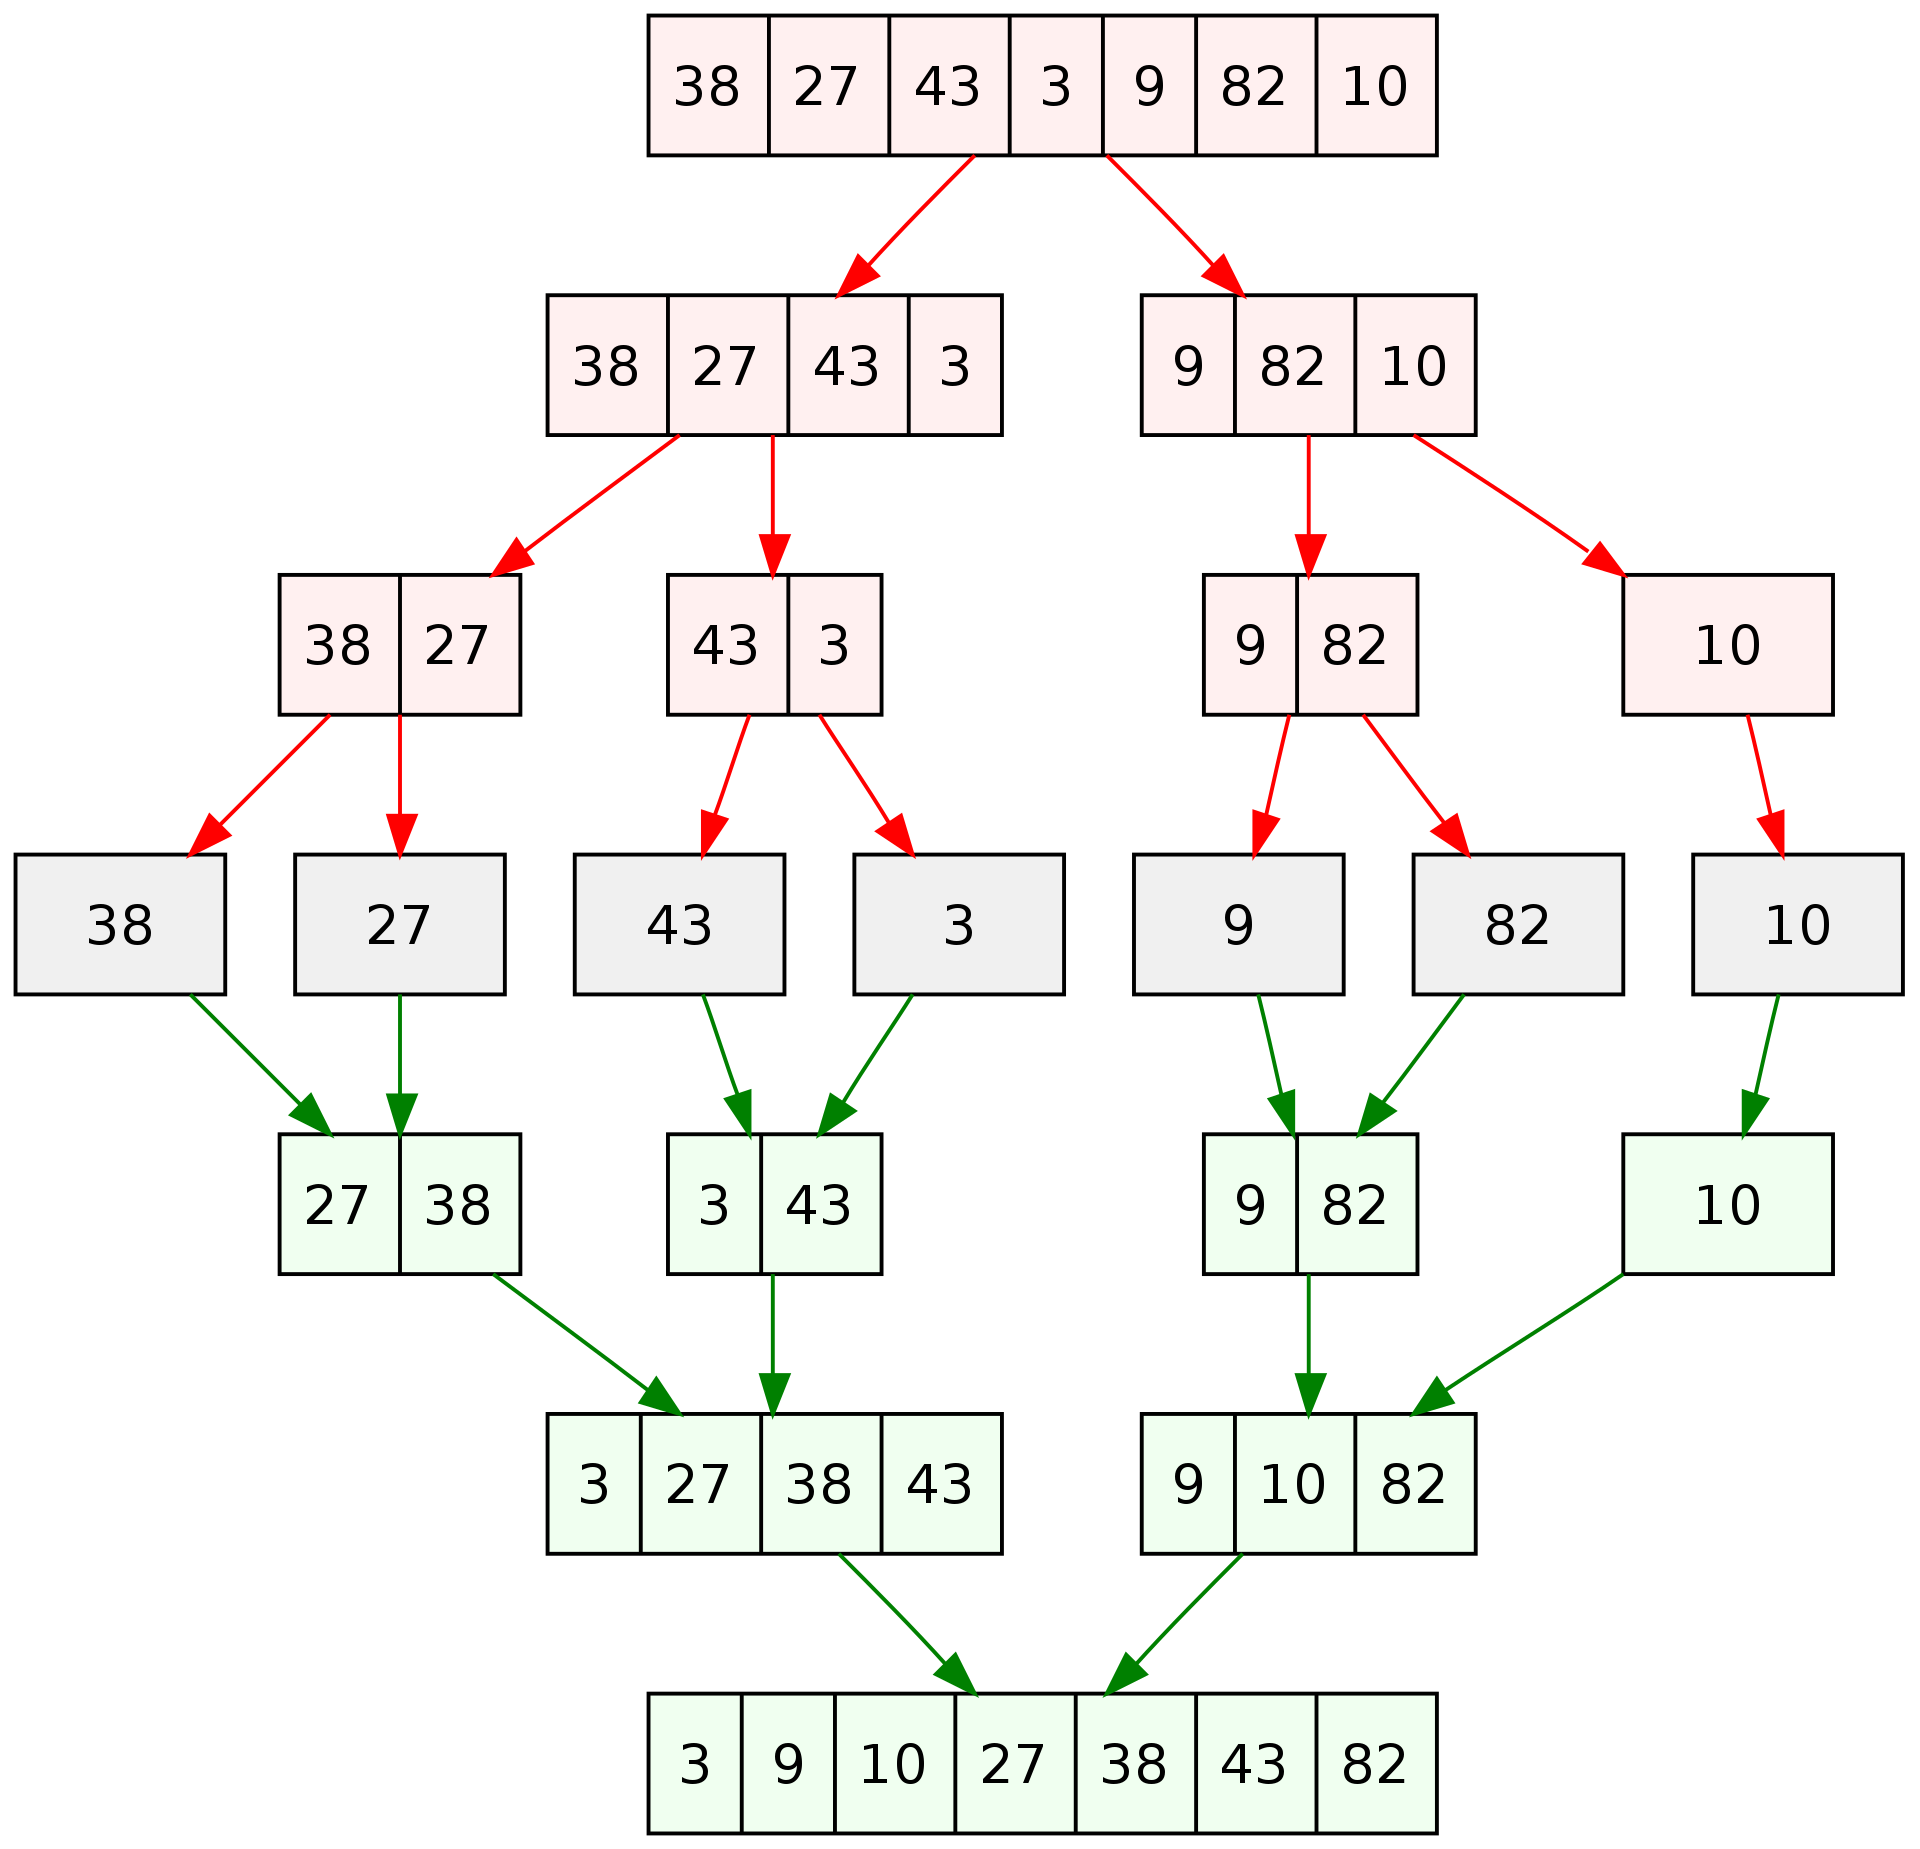
</div>

***

The above figure portaits the implementation of the Merge Sort algorithm. In red we have the Divide step and in Green we have the Conquer step.

**The Performance**:

During the divide step, we split the $n$ array into $log(n)$ arrays. Thus, the running time of the divide step is $O(log(n))$. Regarding the conquer step, merging all the sublists into a list takes $O(n)$ time. Thus, the worst case running time of Merge Sort is $O(n \ log(n))$ which for larger arrays is much faster than Insertion Sort.

**Implementation In Julia**:

In [69]:
#First We define the function for the conquer step(i.e. the function to merge the subarrays)

function Merge(a1,a2) #the funciton takes two arrays
    C = []                                     #we generate an empy array C
    while size(a1)[1] != 0 && size(a2)[1] != 0 # while the size of both arrays is different from zero...
        if a1[1] < a2[1]                       # we confront the first elements of the two arrays...
            push!(C, popfirst!(a1))            # if the element of a1 is larger, we append it to C
        else 
            push!(C, popfirst!(a2))            # else, we append the element of a2
        end 
    end
    while size(a1)[1] != 0                     # while the size of the a1 is != 0 and size a2 == 0
        push!(C, popfirst!(a1))                # we append a1 to C
    end 
    while size(a2)[1] != 0                     # while the size of the a2 is != 0 and size a1 == 0
        push!(C, popfirst!(a2))                # we append a2 to C
    end 
    return C                                   # The array C contains the elements of a1 and a2 sorted
end            

Merge (generic function with 1 method)

In [81]:
#Next, we define the merge sort algorithm. As it is a divide and conquer algorithm, we can code it using recursion

function Merge_Sort(array) #the function takes an array
    n = size(array)[1]     
    if n == 1
        return array             #if the size of the array is equal to 1, we return the array (pretty obvious)
    end 
    left = array[1:div(n,2)]     #now we split the array into 2 subarrays, left and right
    right = array[div(n,2)+1:n]
    left = Merge_Sort(left)      # we call merge sort recursively on the left subarray 
    right = Merge_Sort(right)    # we call merge sort recursively on the right subarray
    final =  Merge(left, right)  # finally, we merge the two subarrays using the Merge.
    return final
end

#=
What is the trick of the algorithm?
Well, say that the array we want to sort is [1,-1,3,-10]

Merge_Sort([1,-1,3,-10])
    n = 4
    left = [1,-1]
    right = [3,-10]

    left =Merge_Sort([1,-1])  First Recursion Call
            n = 2
            left = [1]
            right = [-1] 
            left = Merge_Sort([1])  returns [1] (n=1)   Second Recursion Call
            right= Merge_Sort([-1]) returns [-1] (n=1)  Third Recursion Call
            final = Merge([1],[-1]) reutrns [-1,1]

    right = Merge_Sort([3,-10]) = [-10,3] Fourth Recursion Call (Same Logic as above)
    final = Merge([-1,1],[-10,3]) returs [-10,-1,1,3]
=#

Merge_Sort (generic function with 1 method)

## Quick Sort

**The Idea**
Just like Merge Sort, Quicksort applies the divide-and-conquer paradigm. 

Again, imagine that we have a deck of cards that we want to sort. What magic are we going to apply now?

 - Pick one card q from the deck 
     - Partition the deck into two smaller decks (left, right) such that:
         - the cards in the left sub-deck are ≤ then the card q
         - the cards in the right sub-deck are ≥ then the card q
             - Place the elements on the table as follows : left -- q -- right
 - Pick two other cards from the sub-decks (c1 from left and c2 from right)
     - Partition the deck on the left into two smaller decks (left1, right1) such that:
          - the cards in left1 are ≤ then  c1
          - the cards in right1 are ≥ then c1
     - Partition the deck on the right into two smaller decks (left2, right2) such that: 
          - the cards in the left2 sub-sub-deck are ≤ then the card c2
          - the cards in the right2 sub-sub-deck are ≥ then the card c2
             - Place the elements on the table as follows : left1 -- c1 -- right1 -- q -- left2 -- c2 -- right2
 - Continue this procedure until all the sub-decs are of size one. 
 - Look at your table. WOW, the cards are sorted!!
 
***
This procedure looks silly, why does it work?

Consider the first partition, we have: 
 - a card q
 - a left sub-deck whose elements are ≤ then q
 - a right sub-deck whose elements are ≥ then q. 
 
Imagine that you merge these elements as follows: you take the right sub-deck, place the card q on top of it and then place the left sub-deck on top of q. <br>
Now, what is special about this new deck? Well, ***the card q is in the correct final position***. That is, even if we sort the whole deck, the card q will be in the same position because all the cards before q are ≤ q (as they belong to the left sub-deck) and all the cards after q are ≥ q as they belong to the right sub-deck.
***

**The Algorithm**
Cards aside, the merge sort algorithm follows a three step process: 
 - **Divide**: Partition the array A[p..r] into two subarrays A[p...q-1] and A[q+1...r] such that A[p...q-1] ≤ q ≤ A[q+1...r]. Compute the index of q as part of this procedure. 
 - **Conquer**: Sort the two subarrays A[p...q-1] and A[q+1...r] by recursive calls to quicksort. 
 - **Combine**: Because the subarrays are already sorted, no work is needed to combine them: the entire array A[p..r] is now sorted.
   
     
**Performance**

The worst case running time of Quick Sort is $\Theta(n^2)$ which is no better than Insertion Sort. However, the average case running time is $O(n\ log(n))$.

Despite mergesort has a better worst case performance, quicksort is considered better than mergesort because: 
 - Quick Sort requires less space (Quicksort is in-place, whereas mergesort is not)-
 - It’s very easy to avoid quicksort’s worst-case run time of $\Theta(n^2)$ almost entirely by using an appropriate choice of the pivot – such as picking it at random 
 
**Implementation In Julia**:

In [71]:
#First, we code the partition function which rearrenges the subarray A[p..r] in place

function Partition(array,p,r)
    x = copy(array[r])
    i = p-1
    for j in p:r-1
        if array[j] <= x
            i = i+1
            swap = copy(array[i])
            array[i] = array[j]
            array[j] = swap
        end
    end
    swap = copy(array[i+1])
    array[i+1] = array[r]
    array[r] = swap
    return i+1
end

Partition (generic function with 1 method)

In [72]:
function Quick_Sort(array,p,r)
    if p<r
        q = Partition(array,p,r)
        Quick_Sort(array,p,q-1)
        Quick_Sort(array,q+1,r)
    end
    return array
end

Quick_Sort (generic function with 1 method)

**Quick Sort with random pivoting**

In [132]:
function Partition_r(array, p, r)
    piv = rand(p:r)
    array[piv], array[r] = array[r], array[piv]
    return Partition(array, p, r)
end

Partition_r (generic function with 1 method)

In [137]:
function Quick_Sort_rand(array,p,r)
    if p<r
        q = Partition_r(array,p,r)
        Quick_Sort_rand(array,p,q-1)
        Quick_Sort_rand(array,q+1,r)
    end
    return array
end

Quick_Sort_rand (generic function with 1 method)

## Benchmarking

#### Helper function: benchmarking

In [73]:
function benchmarking(func,iter, worst = false)
    times = []
    array_size = []
    for i in 1:iter
        sum = 0
        for k in 1:1000
            if worst == true
                array = sort(rand(-100000:100000, 20*i), rev = true)
            else 
                array = rand(-100000:100000, 20*i)
            end
            t = @timed func(array)
            sum += t.time
        end
        mean = sum/1000
        push!(array_size, 20*i)
        push!(times,mean)
    end
    return array_size,times
end

benchmarking (generic function with 2 methods)

In [74]:
function benchmarking_quick(func,iter, worst = false)
    times = []
    array_size = []
    for i in 1:iter
        sum = 0
        for k in 1:1000
            if worst == true
                array = sort(rand(-100000:100000, 20*i), rev = true)
            else 
                array = rand(-100000:100000, 20*i)
            end
            t = @timed func(array,1,20*i)
            sum += t.time
        end
        mean = sum/1000
        push!(array_size, 20*i)
        push!(times,mean)
    end
    return array_size,times
end

benchmarking_quick (generic function with 2 methods)

In [75]:
#using Pkg
#Pkg.add("Plots")
#Note: Uncomment the lines above to install the plotting package

using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [76]:
sizes = 100
array_size_ins, times_ins = benchmarking(Insertion_Sort,sizes)
array_size_ms, times_ms = benchmarking(Merge_Sort,sizes)
array_size_qs, times_qs = benchmarking_quick(Quick_Sort,sizes)
array_size_qs_r, times_qs_r = benchmarking_quick(Quick_Sort_rand,sizes)
array_size_ins_w, times_ins_w = benchmarking(Insertion_Sort,sizes, true)
array_size_ms_w, times_ms_w = benchmarking(Merge_Sort,sizes, true)
array_size_qs_w, times_qs_w = benchmarking_quick(Quick_Sort,sizes, true)
array_size_qs_wr, times_qs_wr = benchmarking_quick(Quick_Sort_rand,sizes,true)
""

""

In [158]:
using Plots
scatter(array_size_ins, times_ins, label = "Insertion Sort")
scatter!(array_size_ms, times_ms, label = "Merge Sort")
scatter!(array_size_qs, times_qs, label = "Quick Sort")
scatter!(array_size_qs_r, times_qs_r, label = "Quick Sort (Randomized)")
p1 = plot!(size= (600,400), legend=:outertopright)
title!("Benchmarking - Average Case")
xlabel!("Size")
ylabel!("Time")
scatter(array_size_ins_w ,times_ins_w, label = "")
scatter!(array_size_ms_w, times_ms_w, label = "")
scatter!(array_size_qs_w, times_qs_w, label = "")
scatter!(array_size_qs_wr, times_qs_wr, label = "")
p2 = plot!(size= (600,400), legend=:outertopright)
title!("Benchmarking - Worst Case")
xlabel!("Size")
ylabel!("Time")
plot!(p1,p2, layout = (1,2),size= (950,400) )

**Conclusions**
***
The algorithms show the expected behaviors both in Worst and Average case running time. 

**Note**: As expected, the Worst case running time of Merge Sort ($O(n \ log(n))$) is much better than the worst case running time of Quick Sort ($O(n^2)$). However, by randomizing the pivoting element, we can easily avoid the worst case running time, obtaining a much better performance than Merge Sort. ***Thus, randomized quick sort is preferable to merge sort both in terms of efficiency and memory allocation.***
